<a href="https://colab.research.google.com/github/Sabiha793/Webacy-Extern-Data-Analytics-Project/blob/main/Extern_Correlation_Analysis_of_Smart_Contract_Risk_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Correlation Analysis in Smart Contract Security Data

Welcome to the advanced section of our analysis series, where we focus on implementing correlation analysis for binary data using Python. In this notebook, we'll dive into calculating both the Phi coefficient and the Point-Biserial correlation, visualizing the results, and interpreting what these correlations tell us about the relationships between different risk tags in smart contract data.

## Objective
Our goal is to enhance your ability to perform and understand advanced statistical analyses, preparing you for data-driven decision-making in cybersecurity or any field requiring detailed data insight.

Before you begin, ensure you have a basic understanding of Python programming and familiarity with libraries such as pandas, matplotlib, and seaborn. If you're ready, let's start by setting up our environment and loading the data!


### Step 1: Import libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# Ensure plots are displayed inline in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Download the dataset

Please note that the dataset that will be downloaded below is a dummy dataset that has been designed for the tutorial. You need to use the actualy dataset provided to you for the analysis

In [ ]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 28.2k/28.2k [00:00<00:00, 32.0MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [ ]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


## Calculate Correlation

To calculate the Phi coefficient, which is suitable for pairs of binary variables, we first need to establish a function that can handle this calculation:

In [ ]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['Is_honeypot'], df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.43014356785902874


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                1093 non-null   object
 1   Smart contract address                      1093 non-null   object
 2   Blog post link                              1093 non-null   object
 3   Audit website                               1093 non-null   object
 4   Chain                                       1093 non-null   object
 5   Is_closed_source                            1093 non-null   bool  
 6   hidden_owner                                1093 non-null   bool  
 7   anti_whale_modifiable                       1093 non-null   bool  
 8   Is_anti_whale                               1093 non-null   bool  
 9   Is_honeypot                                 1093 non-null   bool  
 10  buy_tax                 

Let's now define the risk columns of our dataset.

Phi value close to 0 indicates no correlation between the two columns.

**Note:** Phi values range from -1 to 1. A negative value of Phi indicates that the variables are inversely related, or when one variable increases, the other decreases. On the other hand, positive values indicate that when one variable increases, so does the other.

In [ ]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']


Now we will calculate the phi coefficient for all the columns

In [ ]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix


Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.377241,0.330545,0.295222,0.378356,0.325367,0.380376,0.392646,0.350922,0.268073,...,0.154701,0.210932,0.188913,0.353457,0.141124,0.258405,0.267738,0.341803,0.368141,0.282918
hidden_owner,0.377241,1.0,0.396169,0.35796,0.318871,0.476409,0.441975,0.400521,0.30169,0.361349,...,0.207843,0.32317,0.179091,0.295992,0.138936,0.234851,0.259852,0.328749,0.299391,0.206395
anti_whale_modifiable,0.330545,0.396169,1.0,0.522184,0.430144,0.467261,0.508889,0.604309,0.343386,0.337212,...,0.234878,0.343256,0.151742,0.367221,0.216158,0.290703,0.30709,0.391393,0.396996,0.324884
Is_anti_whale,0.295222,0.35796,0.522184,1.0,0.361724,0.504441,0.485596,0.480527,0.345546,0.271046,...,0.214742,0.274977,0.214919,0.327664,0.163063,0.363041,0.270344,0.344022,0.380936,0.304734
Is_honeypot,0.378356,0.318871,0.430144,0.361724,1.0,0.385562,0.42062,0.382178,0.473817,0.275998,...,0.19862,0.220442,0.229566,0.353648,0.200276,0.401028,0.328827,0.457276,0.436948,0.382178
buy_tax,0.325367,0.476409,0.467261,0.504441,0.385562,1.0,0.706026,0.468933,0.342314,0.344645,...,0.271892,0.306085,0.178313,0.303088,0.188246,0.359557,0.277935,0.377879,0.425561,0.327965
sell_tax,0.380376,0.441975,0.508889,0.485596,0.42062,0.706026,1.0,0.466078,0.379094,0.274693,...,0.309845,0.325616,0.204843,0.332492,0.199511,0.339642,0.334513,0.35248,0.430177,0.307444
slippage_modifiable,0.392646,0.400521,0.604309,0.480527,0.382178,0.468933,0.466078,1.0,0.315123,0.352786,...,0.233869,0.307745,0.204737,0.378341,0.217158,0.321931,0.351499,0.354841,0.431227,0.316176
Is_blacklisted,0.350922,0.30169,0.343386,0.345546,0.473817,0.342314,0.379094,0.315123,1.0,0.25251,...,0.151716,0.32934,0.165155,0.355839,0.204795,0.317108,0.273813,0.394809,0.455437,0.325302
can_take_back_ownership,0.268073,0.361349,0.337212,0.271046,0.275998,0.344645,0.274693,0.352786,0.25251,1.0,...,0.250195,0.353414,0.166029,0.269045,0.163273,0.314297,0.233799,0.367523,0.311373,0.234152


Now even though we have the full correlation matrix in front of us, it is very difficult to visualize. One thing that we can do is only display those correlations where value is significantly positive or negative.

But a much better way is to visualize this matrix as a heatmap.

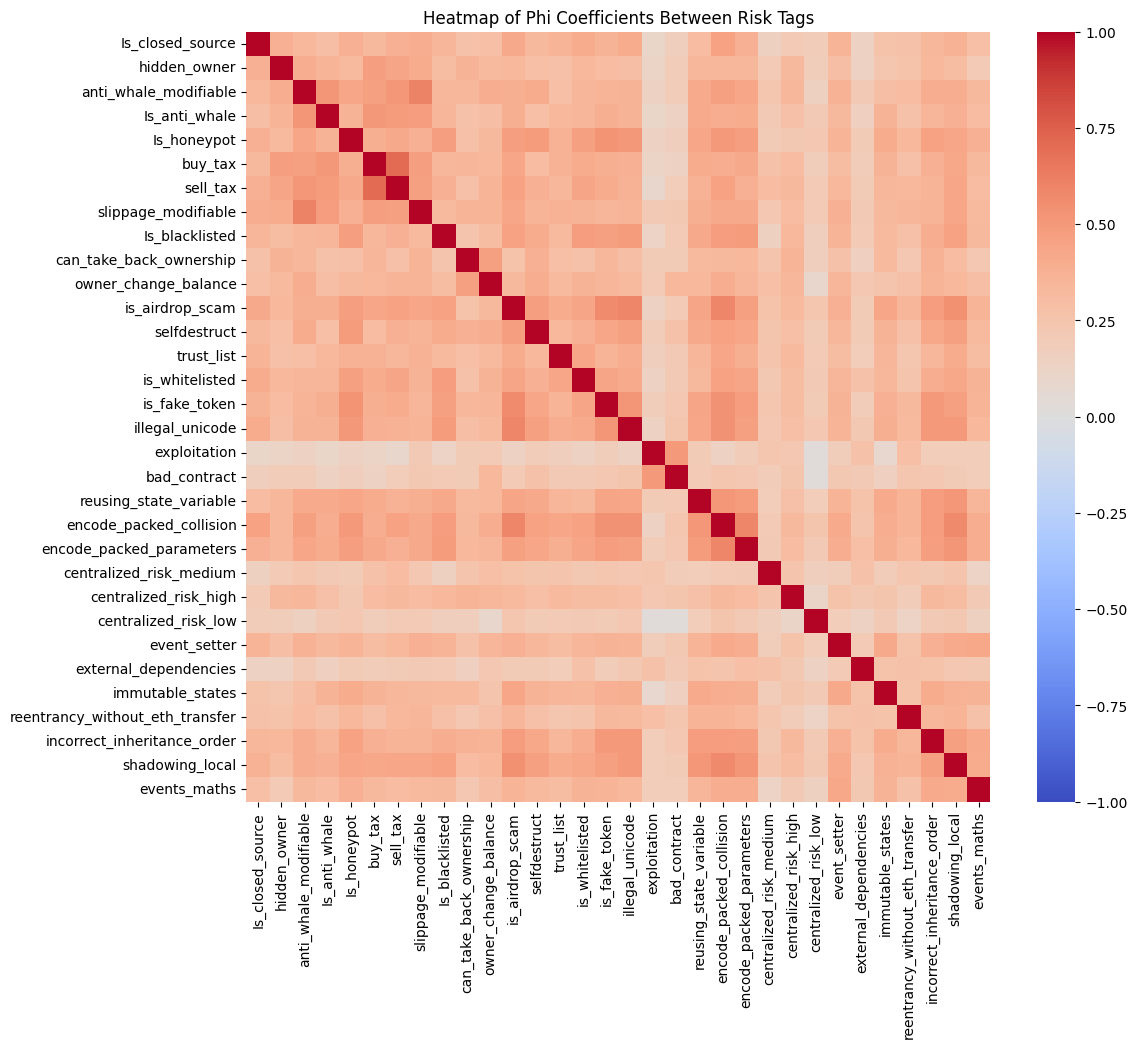

In [ ]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()


You can experiment with a variety of versions of this heatmap to improve visibility of the trends